# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# create base open weather api cell
url = "http://api.openweathermap.org/data/2.5/weather?"

#concatonate url and api key for query
query_url = url + "appid=" + weather_api_key + "&q="

### create lists to fill DF for notable values from api calls. Coment out when graphin so as not to empty lists
# humidity = []
# lat = []
# temp = []
# cloudiness = []
# country = []
# date = []
# long = []
# windspeed = []
# name = []
# max_temp = []
# len(cities)


In [8]:
# create counter to track list index and iterate through list
# i = 593
# cities[i]
# i

In [643]:
# loop through list and append empty lists with values for city data from json response. 
# Iterate 10 cities at a time to avoiad API timeouts

for city in cities[i:i+10]:
    response = requests.get(query_url + city + '&units=imperial').json()
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    cloudiness.append(response['clouds']['all'])
    windspeed.append(response['wind']["speed"])
    country.append(response['sys']['country'])
    humidity.append(response['main']['humidity'])
    name.append(response['name'])
    max_temp.append(response['main']['temp_max'])
    date.append(response['dt'])
    i += 1
    print(city)

# response

port lincoln
los alamos
korla
salalah
zadar
senica
north bend
nemetker
chifeng
linxia


In [649]:
# create dictionary of lists
weather_dict = {
    "City": name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Lat": lat,
    "Lng":long,
    "Temp": temp,
    "Windspeed":windspeed,
    "Humidity":humidity,
    'Max_temp':max_temp,
}
# convert dictionary to DF
weather_data = pd.DataFrame(weather_dict)

# drop possible duplicates from DF
weather_data = weather_data.drop_duplicates()

# weather_data.to_csv('WeatherPy.csv')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 522
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        519 non-null    object 
 1   Cloudiness  519 non-null    int64  
 2   Country     519 non-null    object 
 3   Date        519 non-null    int64  
 4   Lat         519 non-null    float64
 5   Lng         519 non-null    float64
 6   Temp        519 non-null    float64
 7   Windspeed   519 non-null    float64
 8   Humidity    519 non-null    int64  
 9   Max_temp    519 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 44.6+ KB


In [664]:
#create function to plot scatter plots
def scatter(x_vals, y_vals):
    plt.scatter(x_vals, y_vals, marker="o", facecolors="lightskyblue", edgecolors="black",
                alpha=.5)
    plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

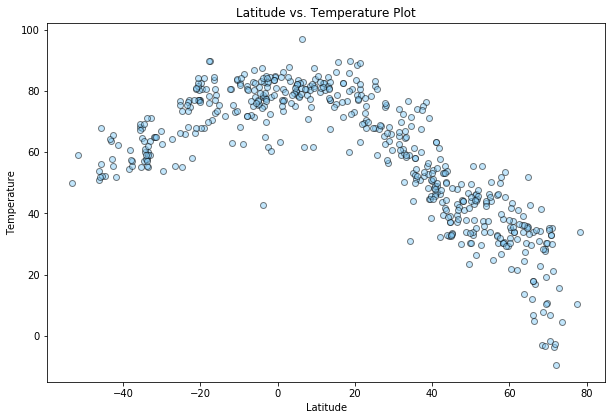

<Figure size 720x475.2 with 0 Axes>

In [666]:
# set default figsize to 10.0, 6.6
plt.rcParams['figure.figsize'] = (10.0, 6.6)

# set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title('Latitude vs. Temperature Plot')

# plot scatter graph
lat_v_temp = scatter(lat, temp)

# save figure to png
plt.savefig(fname = 'Latitude_vs_Temperature.png')

#### Latitude vs. Humidity Plot

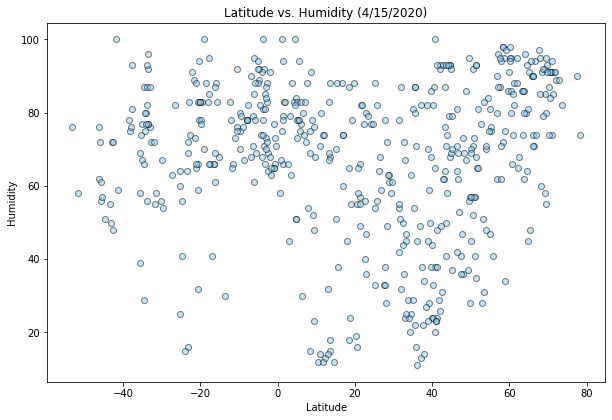

<Figure size 720x475.2 with 0 Axes>

In [670]:
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs. Humidity (4/15/2020)')

scatter(lat, humidity)

plt.savefig(fname = 'Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

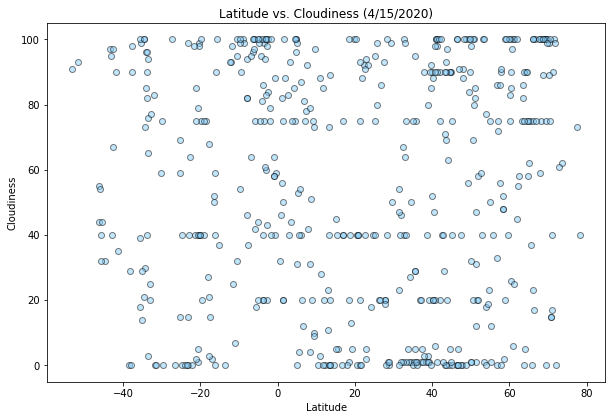

<Figure size 720x475.2 with 0 Axes>

In [669]:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs. Cloudiness (4/15/2020)')

scatter(lat, cloudiness)

plt.savefig(fname = 'Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

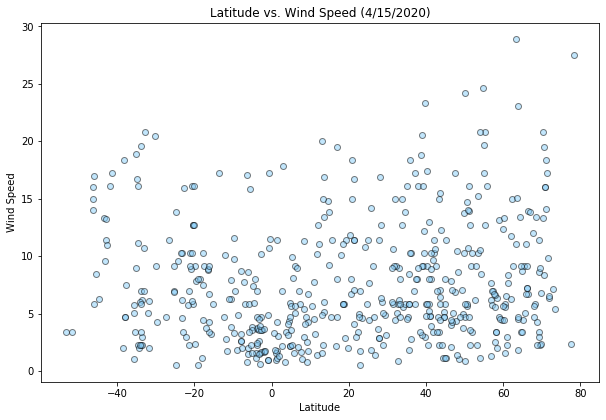

<Figure size 720x475.2 with 0 Axes>

In [668]:
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs. Wind Speed (4/15/2020)')

scatter(lat, windspeed)

plt.savefig(fname = 'Latitude_vs_Wind_Speed.png')

## Linear Regression

In [1]:
# # OPTIONAL: Create a function to create Linear Regression plots
# #calculate correlation coefficient

# create function to caluclate and plot linear regression
def regress(x_values,y_values):
    corr = stats.pearsonr(x_values,y_values)
    print(f'The correlation coefficient is {round(corr[0],2)}')
    x_series = pd.Series(x_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_series * slope + intercept
    plt.plot(x_values, regress_values, 'r-')

In [2]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data[weather_data['Lat']>=0]
southern_hemisphere = weather_data[weather_data['Lat']<0]

NameError: name 'weather_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.89


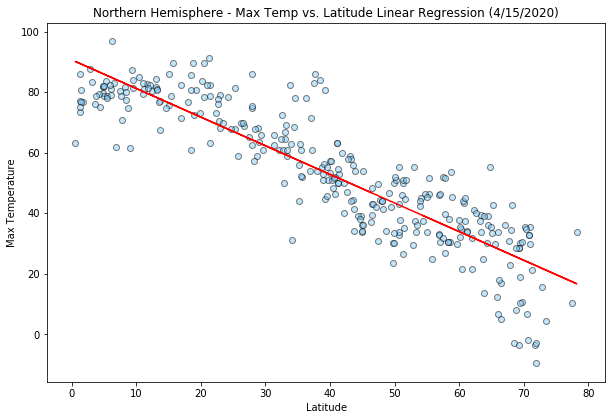

<Figure size 720x475.2 with 0 Axes>

In [674]:
n_lat = northern_hemisphere['Lat'].tolist()
n_max = northern_hemisphere['Max_temp'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (4/15/2020)')
regress(n_lat, n_max)
scatter(n_lat, n_max)

plt.savefig(fname = 'North Latitude_vs_Temp_regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.73


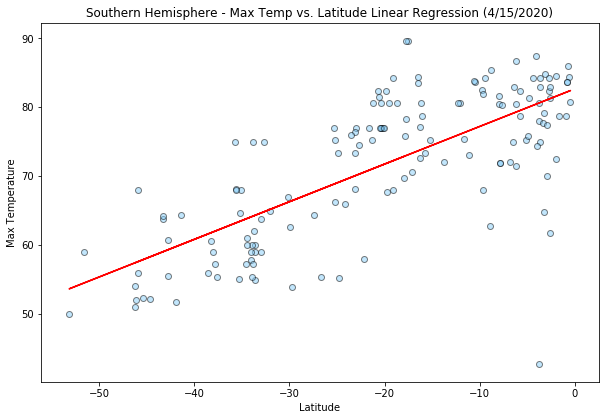

<Figure size 720x475.2 with 0 Axes>

In [676]:
s_lat = southern_hemisphere['Lat'].tolist()
s_max = southern_hemisphere['Max_temp'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (4/15/2020)')

regress(s_lat, s_max)
scatter(s_lat, s_max)

plt.savefig(fname = 'South_Latitude_vs_Temp_regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.28


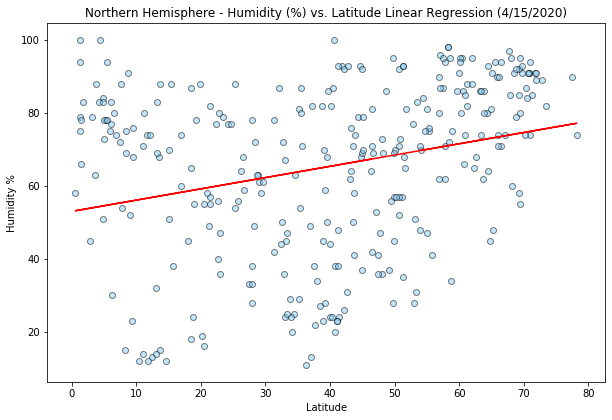

<Figure size 720x475.2 with 0 Axes>

In [678]:
n_hum = northern_hemisphere['Humidity'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/15/2020)')

regress(n_lat, n_hum)
scatter(n_lat, n_hum)

plt.savefig(fname = 'North_Latitude_vs_Humidity_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.19


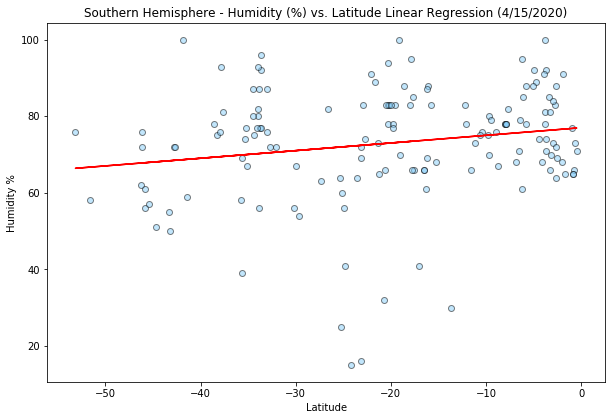

<Figure size 720x475.2 with 0 Axes>

In [680]:
s_hum = southern_hemisphere['Humidity'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/15/2020)')

regress(s_lat, s_hum)
scatter(s_lat, s_hum)

plt.savefig(fname = 'South_Latitude_vs_Humidity_regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.2


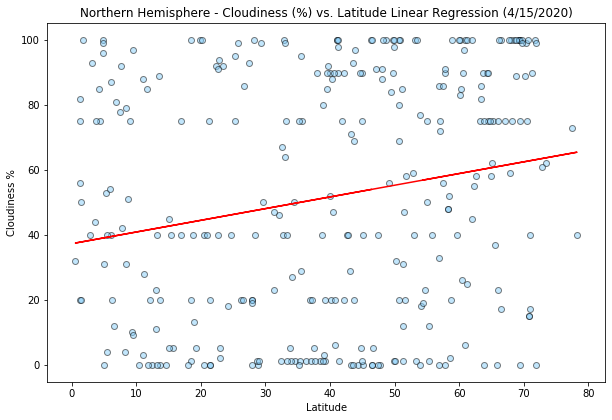

<Figure size 720x475.2 with 0 Axes>

In [682]:
n_clouds = northern_hemisphere['Cloudiness'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/15/2020)')

regress(n_lat, n_clouds)
scatter(n_lat, n_clouds)

plt.savefig(fname = 'North_Latitude_vs_Cloudiness_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.18


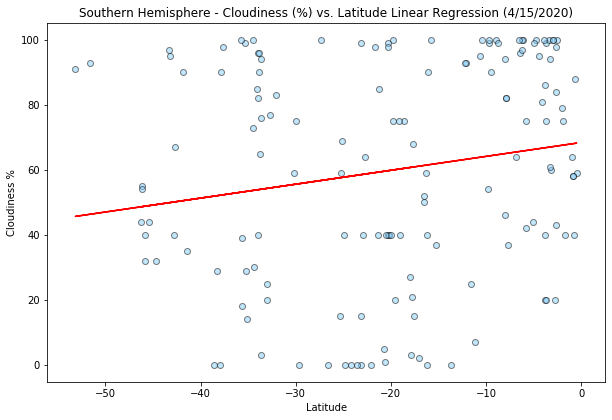

<Figure size 720x475.2 with 0 Axes>

In [684]:
s_clouds = southern_hemisphere['Cloudiness'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/15/2020)')

regress(s_lat, s_clouds)
scatter(s_lat, s_clouds)

plt.savefig(fname = 'South_Latitude_vs_Cloudiness_regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.21


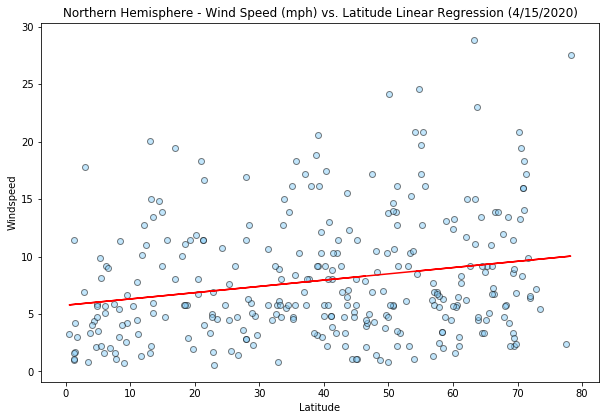

<Figure size 720x475.2 with 0 Axes>

In [687]:
n_winds = northern_hemisphere['Windspeed'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/15/2020)')

regress(n_lat, n_winds)
scatter(n_lat, n_winds)

plt.savefig(fname = 'North_Latitude_vs_Wind_Speed_Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.34


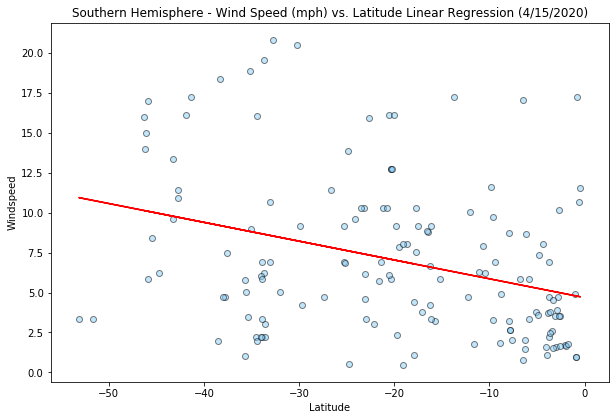

<Figure size 720x475.2 with 0 Axes>

In [689]:
s_winds = southern_hemisphere['Windspeed'].tolist()

plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/15/2020)')

regress(s_lat, s_winds)
scatter(s_lat, s_winds)

plt.savefig(fname = 'South_Latitude_vs_Wind_Speed_Regression.png')